# [ProDS Asso] Set2

In [1]:
import pandas as pd
import numpy as np

In [2]:
# =============================================================================
# 데이터 읽기 및 데이터 타입 확인
# =============================================================================

dat2=pd.read_csv("BlackFriday.csv")
dat2.dtypes


dat2.columns.values
# ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation',
#  'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status',
#  'Product_Category', 'Purchase', 'Type']

dat2.Age.value_counts()

26-35    184510
36-45     95036
18-25     83542
46-50     38522
51-55     32473
55+       17809
0-17      13450
Name: Age, dtype: int64

## Q1

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

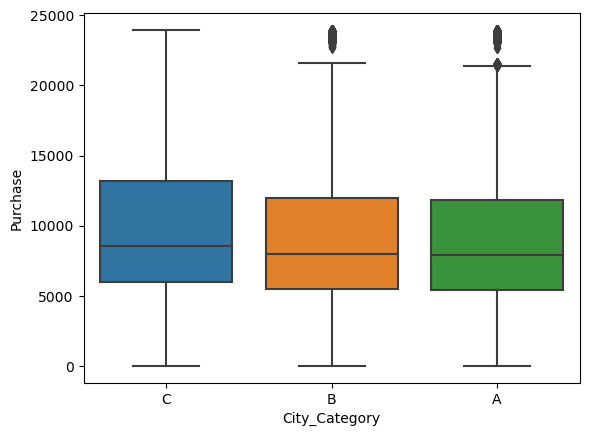

In [3]:
q1 = dat2.copy()


import seaborn as sns

sns.boxplot(data=q1, y='Purchase', x='City_Category')

In [4]:
q1_tab=q1.groupby('City_Category')['Purchase'].median()

abs(q1_tab.max() - q1_tab.min())

# 답: 651

651.0

## Q2

In [5]:
import numpy as np
import scipy
import scipy.stats

from scipy.stats import ttest_ind

q2=pd.pivot_table(dat2, index='User_ID',columns='Age',
                  values='Purchase', aggfunc='sum')


q2_45=q2['46-50'].dropna()
q2_51=q2['51-55'].dropna()


## default 등분산 가정
out1=ttest_ind(q2_45, q2_51, equal_var=True)
np.trunc(out1.pvalue*1000)/1000


# 답: 0.769

0.769

## Q3

In [6]:
q3=dat2.copy()


q3['VIP'].value_counts()

train=q3[q3.Type == 'train']
test=q3[q3.Type == 'test']

train.columns

var_list= ['Gender', 'City_Category_B', 'City_Category_C',
  'Occupation_1', 'Occupation_2', 'Occupation_3', 'Occupation_4',
  'Occupation_5', 'Occupation_6', 'Occupation_7', 'Occupation_8',
  'Occupation_9', 'Occupation_10', 'Occupation_11', 'Occupation_12',
  'Occupation_13', 'Occupation_14', 'Occupation_15', 'Occupation_16',
  'Occupation_17', 'Occupation_18', 'Occupation_19', 'Occupation_20',
  'Marital_Status']


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, confusion_matrix

logit=LogisticRegression(random_state=123, solver='newton-cg', C=100000)
logit.fit(train[var_list],train['VIP'])

pred=logit.predict(test[var_list])

round(recall_score(test['VIP'], pred, pos_label=1),2)


# 답: 0.98

0.98

In [7]:
confusion_matrix(test['VIP'], pred)

array([[  2259,  23025],
       [  1890, 112336]], dtype=int64)